# Buid the model

In [1]:
from matplotlib.pyplot import cla
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [2]:
TRAIN_DIR =  "C:\Build\SnakeImages\\train"
VALIDATE_DIR =  "C:\Build\SnakeImages\\validate"

In [3]:
# build the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (224,224,3)    ))

model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),  activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),  activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

#final layer:
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       2

In [5]:
# create the train data augmentation object
# ==========================================

train_datagen = image.ImageDataGenerator(
    zoom_range=0.2 , shear_range=0.2, rescale=1. / 255 , horizontal_flip=True
)

val_datagen = image.ImageDataGenerator( rescale= 1. / 255)

train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR , target_size=(224,224) , batch_size=32 , class_mode='binary')
val_data = val_datagen.flow_from_directory(directory=VALIDATE_DIR, target_size=(224,224), batch_size=32, class_mode='binary')

Found 132 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [6]:
# create model check point for the performence of the model

from keras.callbacks import ModelCheckpoint , EarlyStopping

In [7]:
# lets stop the training if the accuracy is good

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01 , patience=5 , verbose=1 , mode='auto')
mc = ModelCheckpoint(filepath='C:\Build\SnakeImages\MyBestModel.h5', monitor='val_accuracy' ,  verbose=1 , mode='auto' , save_best_only=True)


call_back = [es, mc]

hist = model.fit(x=train_data, epochs=30 , verbose=1, validation_data=val_data, callbacks=call_back)

h = hist.history
print('Keys : ', h.keys() )

Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 1.4531 - accuracy: 0.6364
Epoch 1: val_accuracy improved from -inf to 0.30000, saving model to C:\Build\SnakeImages\MyBestModel.h5


C:\Users\olivi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 38s 5s/step - loss: 1.4531 - accuracy: 0.6364 - val_loss: 0.9722 - val_accuracy: 0.3000
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 0.3614 - accuracy: 0.8106
Epoch 2: val_accuracy improved from 0.30000 to 1.00000, saving model to C:\Build\SnakeImages\MyBestModel.h5
5/5 [==============================] - 28s 5s/step - loss: 0.3614 - accuracy: 0.8106 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 0.0694 - accuracy: 0.9848
Epoch 3: val_accuracy did not improve from 1.00000
5/5 [==============================] - 28s 7s/step - loss: 0.0694 - accuracy: 0.9848 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9848
Epoch 4: val_accuracy did not improve from 1.00000
5/5 [==============================] - 33s 6s/step - loss: 0.0353 - accuracy: 0.9848 - val_loss: 3.9091 - val_accuracy: 0.5000
Epoch 

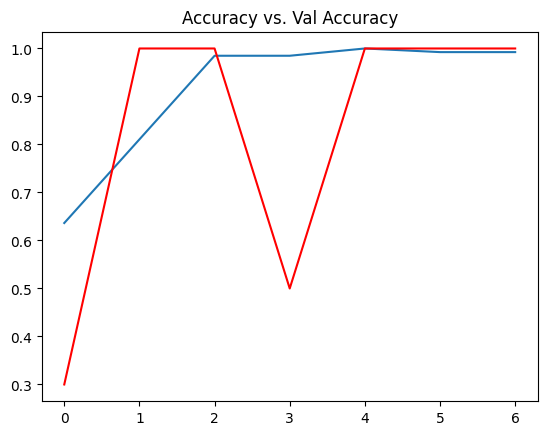

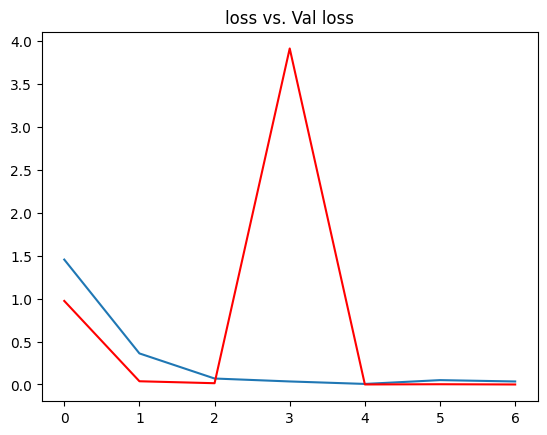

In [8]:
#accuracy 
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('Accuracy vs. Val Accuracy')
plt.show()

#loss
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs. Val loss')
plt.show()